In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os

In [6]:
base_dir =  r"./car-vs-bike-classification-dataset/Car-Bike-Dataset/"
folders = os.listdir(base_dir)
print(folders)

['Car', 'Bike']


In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(256 , 256),
    batch_size= 32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(256, 256),
    batch_size= 32,
    class_mode='categorical',
    subset='validation')

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [8]:
labels = (train_generator.class_indices)
labels = dict((v , k) for k , v in labels.items())
print(labels)

{0: 'Bike', 1: 'Car'}


In [9]:
base_model = tf.keras.applications.VGG19(input_shape=(256, 256,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )
base_model.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [10]:
model_vgg = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation="softmax")
])

model_vgg.compile(loss='categorical_crossentropy' , optimizer=tf.keras.optimizers.Adam(lr = 0.001) , metrics='accuracy')

In [11]:
model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 8, 8, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 512)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 2)                 16386     
                                                                 
Total params: 20040770 (76.45 MB)
Trainable params: 16386 (64.01 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [12]:
hist_vgg = model_vgg.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 10 ,
          steps_per_epoch = 3200/32,
          validation_steps = 800/32,
          )

Epoch 1/10
100/100 [==============================] - 100s 845ms/step - loss: 0.1793 - accuracy: 0.9209 - val_loss: 0.0931 - val_accuracy: 0.9650
Epoch 2/10
100/100 [==============================] - 73s 732ms/step - loss: 0.0752 - accuracy: 0.9688 - val_loss: 0.0877 - val_accuracy: 0.9675
Epoch 3/10
100/100 [==============================] - 73s 734ms/step - loss: 0.0543 - accuracy: 0.9816 - val_loss: 0.0748 - val_accuracy: 0.9750
Epoch 4/10
100/100 [==============================] - 71s 714ms/step - loss: 0.0453 - accuracy: 0.9841 - val_loss: 0.0719 - val_accuracy: 0.9750
Epoch 5/10
100/100 [==============================] - 73s 733ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.0652 - val_accuracy: 0.9800
Epoch 6/10
100/100 [==============================] - 71s 712ms/step - loss: 0.0323 - accuracy: 0.9903 - val_loss: 0.0804 - val_accuracy: 0.9750
Epoch 7/10
100/100 [==============================] - 71s 712ms/step - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.0650 - val_a

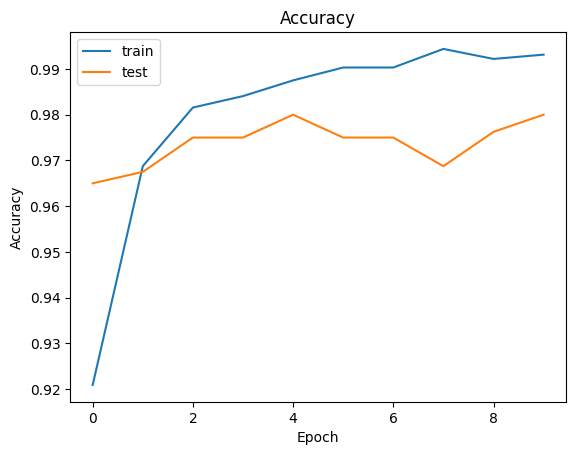

In [13]:
plt.plot(hist_vgg.history['accuracy'])
plt.plot(hist_vgg.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

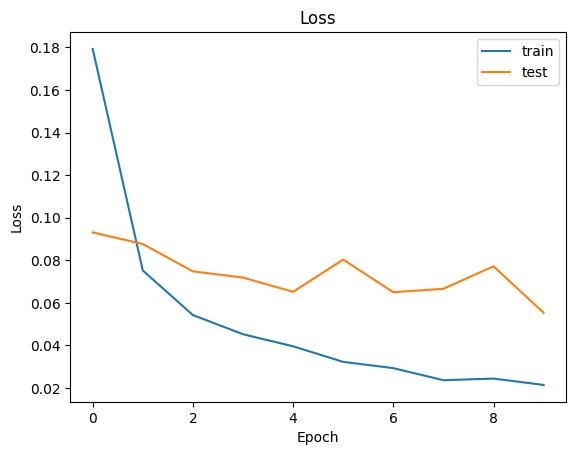

In [14]:
plt.plot(hist_vgg.history['loss'])
plt.plot(hist_vgg.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()